## Assignment 5 - Helper Functions

In [1]:
%pylab inline
#just in case
%matplotlib inline 

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                # Speed improvement provided by Guankun Mu (gkmu)
                for name in data[classes].drop_duplicates(keep='first'):
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


-----------------------

### Assignment 6

Graphs the data relationships and linear regression models with relevant statistics:

In [2]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/\
machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal_Length', 'Sepal_Width',
                                   'Petal_Length', 'Petal_Width',
                                   'Species'], header=None)
iris = iris.dropna()

Pairwise scatterplot graphs.  Petal Length and Petal Width appear to have the closest linear relationship:

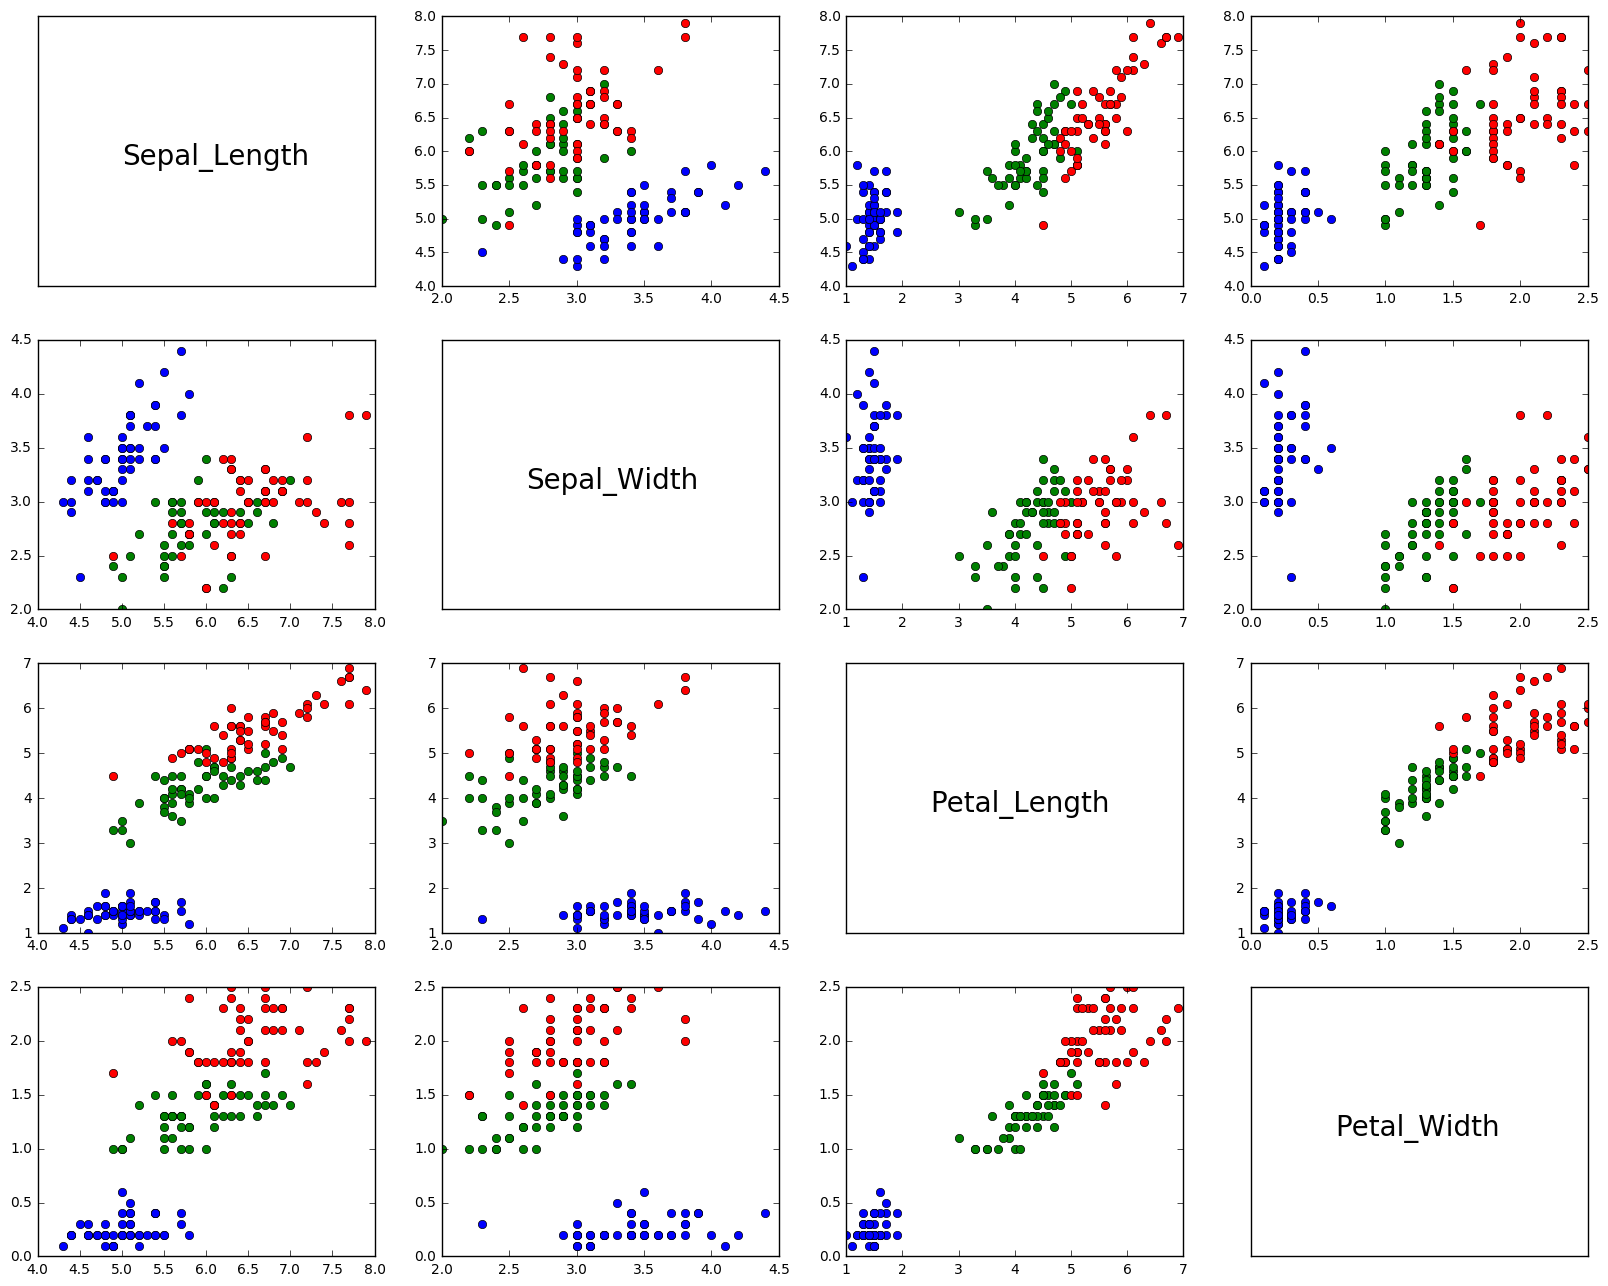

In [3]:
pairs(iris)

Linear regression models:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

def _compute_linreg(x_train, x_test, y_train, y_test):
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(x_test) - y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x_test, y_test))
    
    return regr

def linreg_iris_2D(data, y_label, x_label, rseed=1):
    data_train, data_test = model_selection.train_test_split(data, random_state=rseed)

    # Split the data into training/testing sets
    iris_x_train = data_train[x_label].values.reshape(-1, 1)
    iris_x_test  = data_test[x_label].values.reshape(-1, 1)

    # Split the targets into training/testing sets
    iris_y_train = data_train[y_label].values.reshape(-1, 1)
    iris_y_test = data_test[y_label].values.reshape(-1, 1)

    regr = _compute_linreg(iris_x_train, iris_x_test, iris_y_train, iris_y_test)

    # Plot outputs
    plt.scatter(iris_x_test, iris_y_test,  color='black')
    plt.plot(iris_x_test, regr.predict(iris_x_test), color='blue',
             linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    
def linreg_iris_2D_old(data, y_label, x_label, test_indices):
    iris_x = data[x_label].values.reshape(-1, 1)
    iris_y = data[y_label].values.reshape(-1, 1)
    
    #test_indices = np.random.choice(iris_X.size, 20)
    train = np.ma.array(range(0, iris_x.size))
    train[test_indices] = np.ma.masked
    train

    # Split the data into training/testing sets
    iris_x_train = iris_x[train]
    iris_x_test = iris_x[test_indices]

    # Split the targets into training/testing sets
    iris_y_train = iris_y[train]
    iris_y_test = iris_y[test_indices]

    regr = _compute_linreg(iris_x_train, iris_x_test, iris_y_train, iris_y_test)

    # Plot outputs
    plt.scatter(iris_x_test, iris_y_test,  color='black')
    plt.plot(iris_x_test, regr.predict(iris_x_test), color='blue',
             linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def linreg_iris_3D(data, y_label, x1_label, x2_label, rseed=1):
    data_train, data_test = model_selection.train_test_split(data, random_state=rseed)

    # Split the data into training/testing sets
    #iris_x1_train = data_train[x1_label].values.reshape(-1, 1)
    #iris_x1_test  = data_test[x1_label].values.reshape(-1, 1)
    iris_x_train = np.array([np.array(data_train[x1_label]), np.array(data_train[x2_label])]).transpose()
    iris_x_test = np.array([np.array(data_test[x1_label]), np.array(data_test[x2_label])]).transpose()
    #iris_x2_train = data_train[x2_label].values.reshape(-1, 1)
    #iris_x2_test  = data_test[x2_label].values.reshape(-1, 1)

    # Split the targets into training/testing sets
    iris_y_train = data_train[y_label].values.reshape(-1, 1)
    iris_y_test = data_test[y_label].values.reshape(-1, 1)

    regr = _compute_linreg(iris_x_train, iris_x_test, iris_y_train, iris_y_test)

    x_test_sorted = np.sort(iris_x_test, axis=0)
    x1, x2 = np.meshgrid(x_test_sorted[:, 0], x_test_sorted[:, 1])
    
    # Plot outputs
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(iris_x_test[:, 0], iris_x_test[:, 1], iris_y_test, color='green')
    ax.plot_surface(x1, x2, regr.predict(x_test_sorted),
                      linewidth=0.2, antialiased=True)
    plt.show()
    
    
def linreg_iris_3D_old(data, y_label, x1_label, x2_label, test_indices):
    iris_x1 = np.array(data[x1_label])
    iris_x2 = np.array(data[x2_label])
    iris_y  = np.array(data[y_label])
    
    #test_indices = np.random.choice(iris_X.size, 20)
    train = np.ma.array(range(0, iris_y.size))
    train[test_indices] = np.ma.masked

    # Split the data into training/testing sets
    iris_x_train = np.array([iris_x1[train], iris_x2[train]]).transpose()
    iris_x_test = np.array([iris_x1[test_indices], iris_x2[test_indices]]).transpose()

    # Split the targets into training/testing sets
    iris_y_train = np.array(iris_y[train])
    iris_y_test = iris_y[test_indices]

    regr = _compute_linreg(iris_x_train, iris_x_test, iris_y_train, iris_y_test)

    x_test_sorted = np.sort(iris_x_test, axis=0)
    x1, x2 = np.meshgrid(x_test_sorted[:, 0], x_test_sorted[:, 1])
    
    # Plot outputs
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(iris_x_test[:, 0], iris_x_test[:, 1], iris_y_test, color='green')
    ax.plot_surface(x1, x2, regr.predict(x_test_sorted),
                      linewidth=0.2, antialiased=True)
    plt.show()

In [6]:
def linreg_iris_4D(data, column_predicted, rseed=1):
    data_train, data_test = model_selection.train_test_split(data[data.columns.difference(['Species'])], 
                                                             random_state=rseed)
    iris_x_train = np.array(data_train[data_train.columns.difference([column_predicted])])
    iris_x_test = np.array(data_test[data_test.columns.difference([column_predicted])])

    iris_y_train = np.array(data_train[column_predicted])
    iris_y_test = np.array(data_test[column_predicted])
    
    #print(data_train)
    #print(data_test)
    regr = _compute_linreg(iris_x_train, iris_x_test, iris_y_train, iris_y_test)

def linreg_iris_4D_old(data, column_predicted, test_indices):
    iris_x = np.array(data[data.columns.difference([column_predicted, 'Species'])])
    iris_y = np.array(data[column_predicted])
    
    #test_indices = np.random.choice(iris_X.size, 20)
    train = np.ma.array(range(0, iris_y.size))
    train[test_indices] = np.ma.masked

    # Split the data into training/testing sets
    iris_x_train = np.array(iris_x[train, :])
    iris_x_test = np.array(iris_x[test_indices, :])

    # Split the targets into training/testing sets
    iris_y_train = np.array(iris_y[train])
    iris_y_test = iris_y[test_indices]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(iris_x_train, iris_y_train)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(iris_x_test) - iris_y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(iris_x_test, iris_y_test))

In [7]:
# Positions of test values chosen across all linear regression models
#test = np.random.choice(len(iris.index), 20)

Simple linear regression models:

Sepal_Length against Sepal_Width:
Coefficients: 
 [[-0.23589419]]
Mean squared error: 0.64
Variance score: -0.00


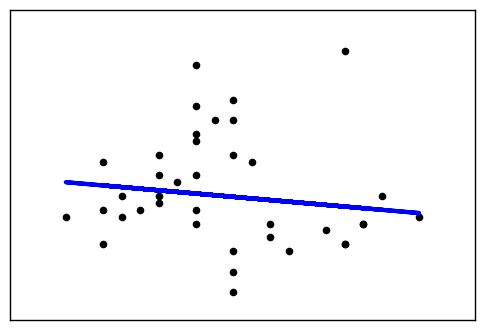

Sepal_Length against Petal_Length:
Coefficients: 
 [[ 0.41798648]]
Mean squared error: 0.22
Variance score: 0.66


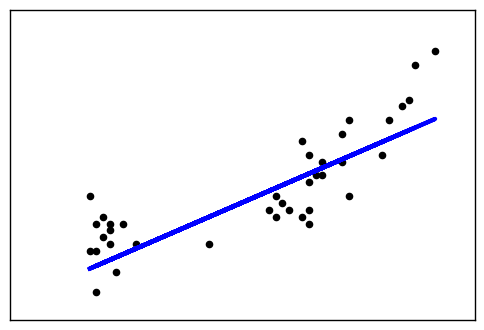

Sepal_Length against Petal_Width:
Coefficients: 
 [[ 0.89252577]]
Mean squared error: 0.24
Variance score: 0.63


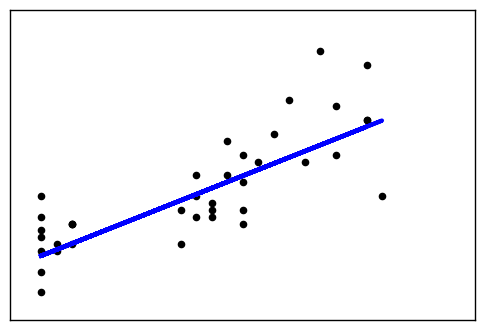

Sepal_Width against Sepal_Length:
Coefficients: 
 [[-0.05822633]]
Mean squared error: 0.23
Variance score: -0.07


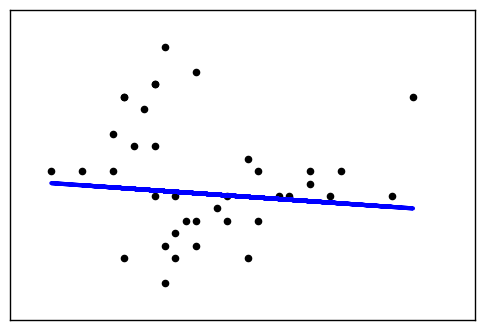

Sepal_Width against Petal_Length:
Coefficients: 
 [[-0.08756776]]
Mean squared error: 0.18
Variance score: 0.18


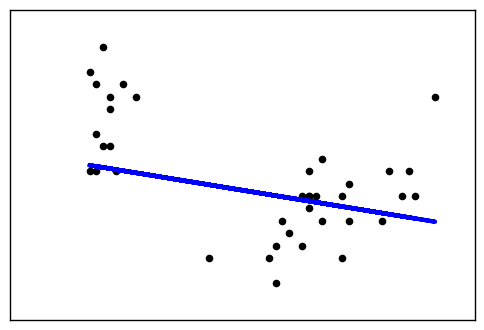

Sepal_Width against Petal_Width:
Coefficients: 
 [[-0.15916022]]
Mean squared error: 0.19
Variance score: 0.13


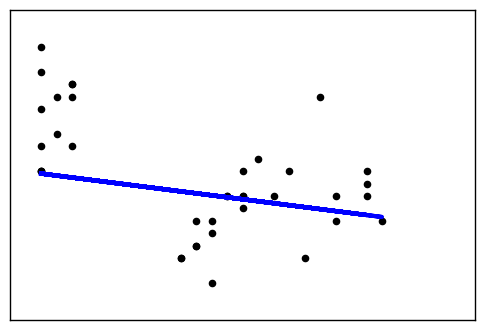

Petal_Length against Sepal_Length:
Coefficients: 
 [[ 1.88729107]]
Mean squared error: 1.00
Variance score: 0.66


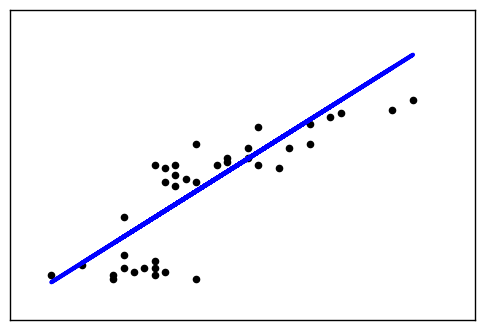

Petal_Length against Sepal_Width:
Coefficients: 
 [[-1.60183846]]
Mean squared error: 2.11
Variance score: 0.28


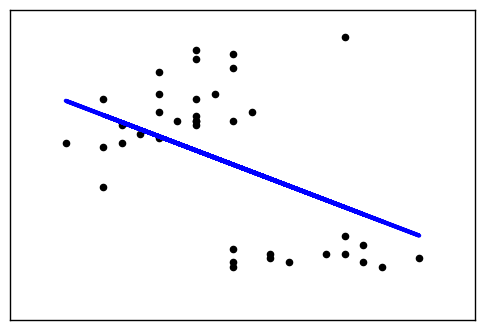

Petal_Length against Petal_Width:
Coefficients: 
 [[ 2.21326246]]
Mean squared error: 0.22
Variance score: 0.92


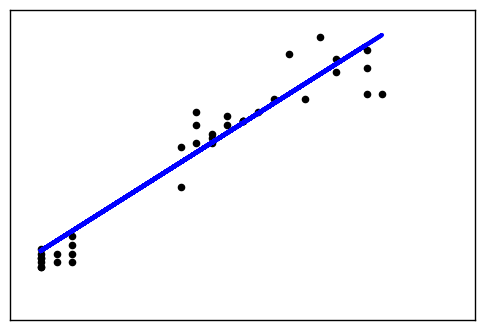

Petal_Width against Sepal_Length:
Coefficients: 
 [[ 0.76308698]]
Mean squared error: 0.20
Variance score: 0.63


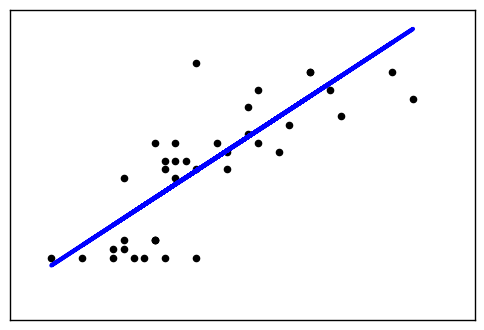

Petal_Width against Sepal_Width:
Coefficients: 
 [[-0.55129701]]
Mean squared error: 0.40
Variance score: 0.25


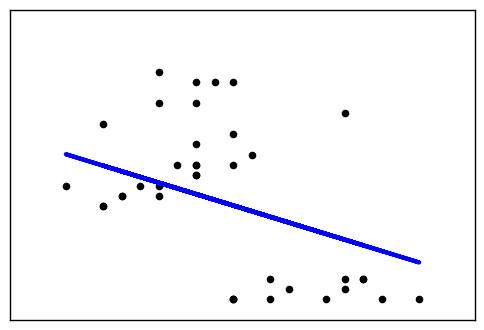

Petal_Width against Petal_Length:
Coefficients: 
 [[ 0.41909217]]
Mean squared error: 0.04
Variance score: 0.92


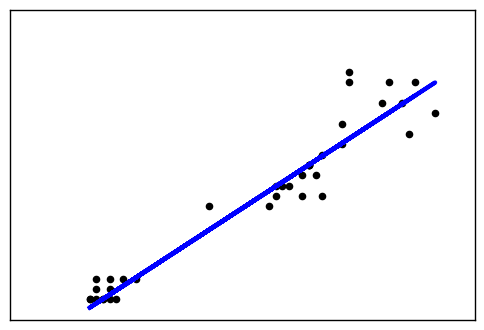

In [8]:
for y in iris.columns[:-1]:
    for x in iris.columns[:-1]:
        if x == y:
            continue
        print(str(y) + ' against ' + str(x) + ':')
        linreg_iris_2D(iris, y, x)

In [9]:
#for y in iris.columns[:-1]:
#    for x in iris.columns[:-1]:
#        if x == y:
#            continue
#        print(str(y) + ' against ' + str(x) + ':')
#        linreg_iris_2D(iris, y, x, test)

Multiple linear regression models:

Sepal_Length against Sepal_Width, Petal_Length:
Coefficients: 
 [[ 0.50440526  0.46215612]]
Mean squared error: 0.11
Variance score: 0.82


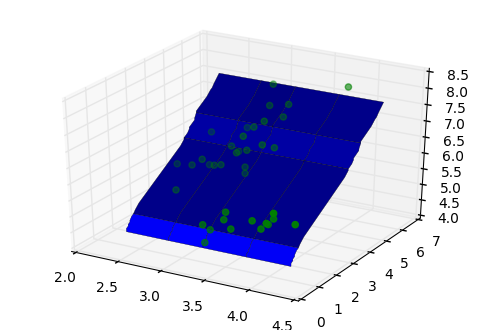

Sepal_Length against Sepal_Width, Petal_Width:
Coefficients: 
 [[ 0.28079043  0.93721644]]
Mean squared error: 0.18
Variance score: 0.72


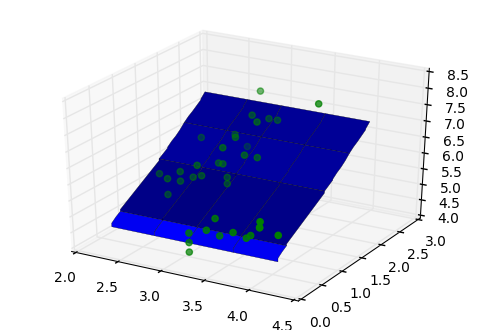

Sepal_Length against Petal_Length, Petal_Width:
Coefficients: 
 [[ 0.60652271 -0.44986818]]
Mean squared error: 0.23
Variance score: 0.64


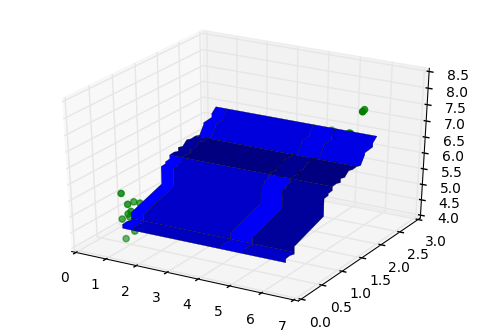

Sepal_Width against Sepal_Length, Petal_Length:
Coefficients: 
 [[ 0.50696511 -0.29947233]]
Mean squared error: 0.08
Variance score: 0.61


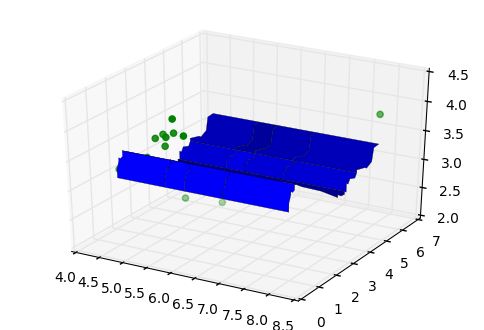

Sepal_Width against Sepal_Length, Petal_Width:
Coefficients: 
 [[ 0.1982495  -0.33610301]]
Mean squared error: 0.15
Variance score: 0.32


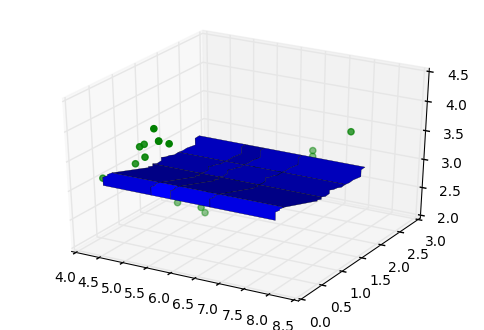

Sepal_Width against Petal_Length, Petal_Width:
Coefficients: 
 [[-0.28803474  0.47833626]]
Mean squared error: 0.19
Variance score: 0.15


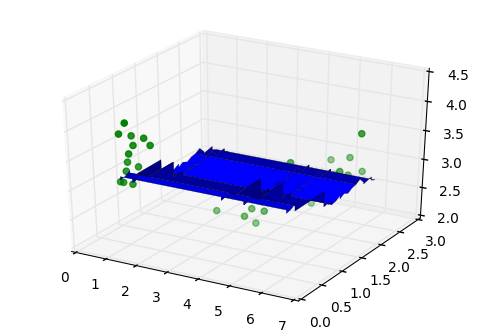

Petal_Length against Sepal_Length, Sepal_Width:
Coefficients: 
 [[ 1.8190064  -1.17274542]]
Mean squared error: 0.38
Variance score: 0.87


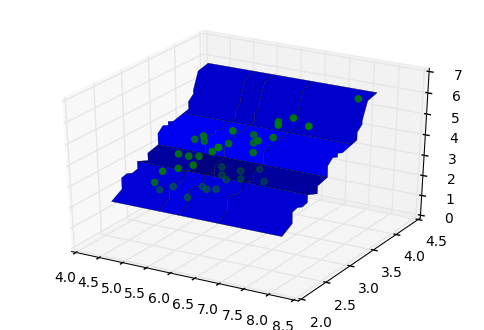

Petal_Length against Sepal_Length, Petal_Width:
Coefficients: 
 [[ 0.62202453  1.65808953]]
Mean squared error: 0.22
Variance score: 0.92


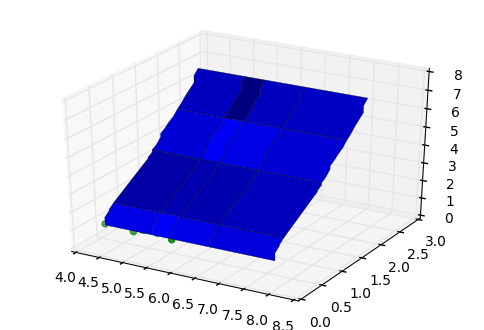

Petal_Length against Sepal_Width, Petal_Width:
Coefficients: 
 [[-0.41838444  2.1466723 ]]
Mean squared error: 0.22
Variance score: 0.92


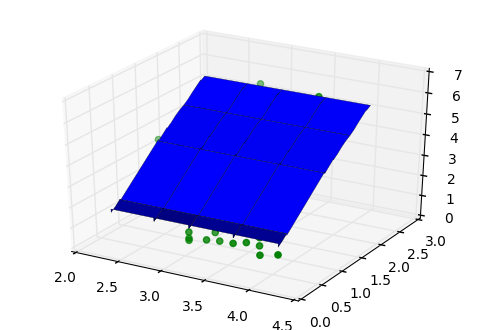

Petal_Width against Sepal_Length, Sepal_Width:
Coefficients: 
 [[ 0.7411671 -0.37646  ]]
Mean squared error: 0.11
Variance score: 0.79


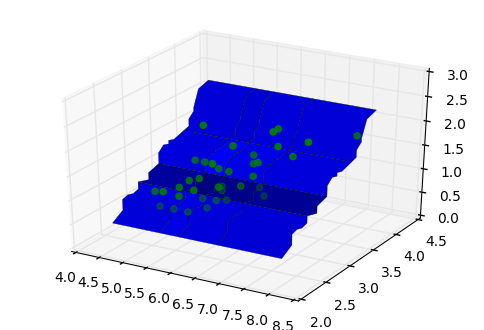

Petal_Width against Sepal_Length, Petal_Length:
Coefficients: 
 [[-0.13196085  0.47425002]]
Mean squared error: 0.05
Variance score: 0.91


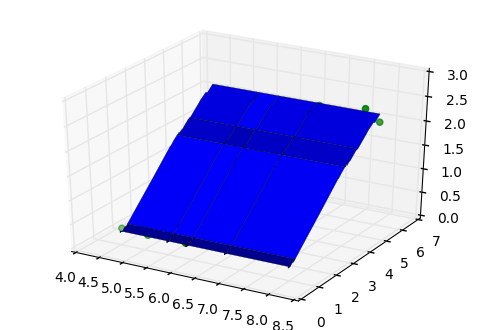

Petal_Width against Sepal_Width, Petal_Length:
Coefficients: 
 [[ 0.13960297  0.43131689]]
Mean squared error: 0.04
Variance score: 0.92


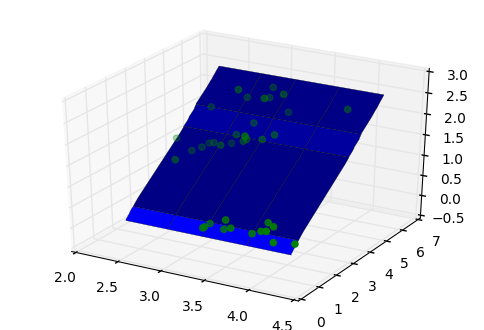

In [10]:
for y in iris.columns[:-1]:
    for x1 in iris.columns[:-1]:
        for x2 in iris.columns[iris.columns.get_loc(x1)+1:-1]:
            if y == x1 or y == x2:
                continue
            print(str(y) + ' against ' + str(x1) + ', ' + str(x2) + ':')
            #linreg_iris_3D(iris, y, x1, x2, test)
            linreg_iris_3D(iris, y, x1, x2)

In [11]:
for x in iris.columns[:-1]:
    print(str(x) + ' against all:')
    linreg_iris_4D(iris, x)
    #linreg_iris_4D(iris, x, test)

Sepal_Length against all:
Coefficients: 
 [ 0.7815888  -0.74059858  0.60779502]
Mean squared error: 0.13
Variance score: 0.80
Sepal_Width against all:
Coefficients: 
 [-0.65562746  0.75098601  0.60606586]
Mean squared error: 0.10
Variance score: 0.53
Petal_Length against all:
Coefficients: 
 [ 1.44701628  0.74652555 -0.62800167]
Mean squared error: 0.15
Variance score: 0.95
Petal_Width against all:
Coefficients: 
 [ 0.55720306 -0.27238883  0.27699733]
Mean squared error: 0.05
Variance score: 0.91


The best overall linear regression model for a pair of features is between Petal Length and Petal Width, with a slightly lower MSE when using Petal Length as the predictor for Petal Width.

Removing the best predicted feature based upon other features (Petal Length) will have a minimal effect on classification performance.  Since most of the information about Petal Length is already available in the other features based on the R^2 value of its linear regression against all other features (around 0.97), the final classification should still be nearly as good.  Dimensionality reduction techniques would likely pick up on this.